In [1]:
from scipy import ndimage
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from skimage import io
import seaborn as sns
import numpy as np
import pandas as pd
import cv2

In [27]:
TRAIN_PATH = '/data/amazon/train-jpg/'
TIFF_PATH = '/data/amazon/train-tif-v2/'
train_df = pd.read_csv('/data/amazon/train_v2.csv')
test_df = pd.read_csv('/data/amazon/sample_submission_v2.csv')

In [28]:
train_df.head()
train_df.tail()

image_name                                           tags
40474  train_40474                                  clear primary
40475  train_40475                                         cloudy
40476  train_40476                      agriculture clear primary
40477  train_40477                 agriculture clear primary road
40478  train_40478  agriculture cultivation partly_cloudy primary

In [29]:
tagnames = list(set([tag for sublist in train_df['tags'].apply(lambda tagstring: tagstring.split()) for tag in sublist]))
print('Tags: ' + '%s' % ', '.join(tagnames))

Tags: clear, road, blow_down, habitation, partly_cloudy, primary, selective_logging, haze, blooming, slash_burn, conventional_mine, artisinal_mine, water, cultivation, agriculture, cloudy, bare_ground


In [30]:
def containsTag(tag, taglist):
    if tag in taglist.split():
        return 1
    else: 
        return 0

In [31]:
for tag in tagnames:
    train_df[tag] = train_df['tags'].apply(lambda taglist: containsTag(tag, taglist))
    
train_df.head()

image_name                                       tags  clear  road  \
0    train_0                               haze primary      0     0   
1    train_1            agriculture clear primary water      1     0   
2    train_2                              clear primary      1     0   
3    train_3                              clear primary      1     0   
4    train_4  agriculture clear habitation primary road      1     1   

   blow_down  habitation  partly_cloudy  primary  selective_logging  haze  \
0          0           0              0        1                  0     1   
1          0           0              0        1                  0     0   
2          0           0              0        1                  0     0   
3          0           0              0        1                  0     0   
4          0           1              0        1                  0     0   

   blooming  slash_burn  conventional_mine  artisinal_mine  water  \
0         0           0                  0               0      0   
1         0           0                  0               0      1   
2         0           0                  0               0      0   
3         0           0                  0               0      0   
4         0           0                  0               0      0   

   cultivation  agriculture  cloudy  bare_ground  
0            0            0       0            0  
1            0            1       0            0  
2            0            0       0            0  
3            0            0       0            0  
4            0            1       0            0

In [32]:
def load_image(ImageName):
    """Convert an image given by filename to a numpy array.

    Note, image sizes are expected to be 256 pixels by 256 pixels
    """
    try:
        image_data = io.imread(ImageName).astype(float)
        if image_data.shape != (256, 256, 4):
            raise Exception('Unexpected image shape: %s' %
                            str(image_data.shape))
    except IOError as e:
        print('Could not read:', image, ':', e, '.')
    return image_data

In [33]:
train_df['jpgFilename'] = train_df['image_name'].apply(lambda name: TRAIN_PATH + name + '.jpg')
train_df['tifFilename'] = train_df['image_name'].apply(lambda name: TIFF_PATH + name + '.tif')

In [34]:
train_df[train_df[['clear', 'haze', 'partly_cloudy', 'cloudy']].sum(axis=1) != 1]

image_name   tags  clear  road  blow_down  habitation  partly_cloudy  \
24448  train_24448  water      0     0          0           0              0   

       primary  selective_logging  haze  \
24448        0                  0     0   

                         ...                      slash_burn  \
24448                    ...                               0   

       conventional_mine  artisinal_mine  water  cultivation  agriculture  \
24448                  0               0      1            0            0   

       cloudy  bare_ground                             jpgFilename  \
24448       0            0  /data/amazon/train-jpg/train_24448.jpg   

                                     tifFilename  
24448  /data/amazon/train-tif-v2/train_24448.tif  

[1 rows x 21 columns]

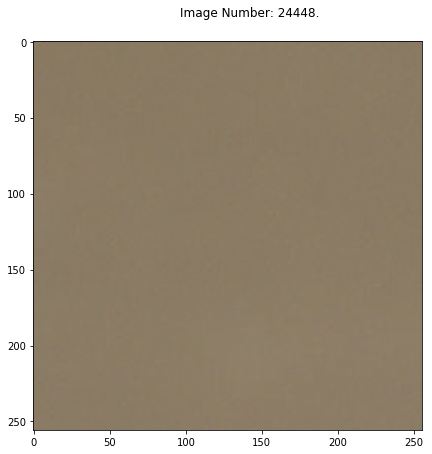

In [94]:
imageplot = plt.figure(figsize=(6, 6))
axis = imageplot.add_axes([0, 0, .9, .9])
_image = cv2.imread(TRAIN_PATH + 'train_24448.jpg')
axis.imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2RGB))
imageplot.suptitle('Image Number: 24448.')
imageplot.savefig('../images/train_24448')

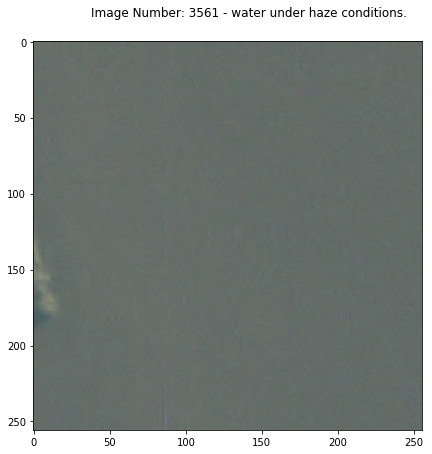

In [95]:
# A comparison water image with haze to see if there is haze.
imageplot = plt.figure(figsize=(6, 6))
axis = imageplot.add_axes([0, 0, .9, .9])
_image = cv2.imread(TRAIN_PATH + 'train_3561.jpg')
axis.imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2RGB))
imageplot.suptitle('Image Number: 3561 - water under haze conditions.')
imageplot.savefig('../images/train_3561')

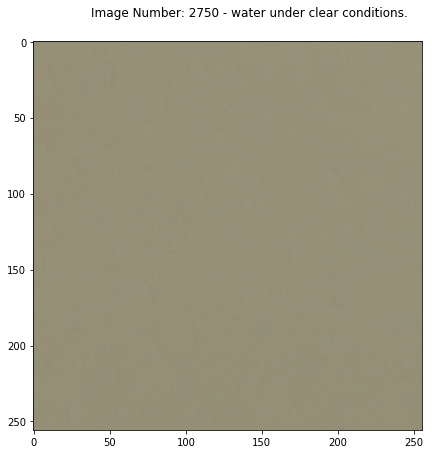

In [96]:
# A comparison water image without haze.
imageplot = plt.figure(figsize=(6, 6))
axis = imageplot.add_axes([0, 0, .9, .9])
_image = cv2.imread(TRAIN_PATH + 'train_2750.jpg')
axis.imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2RGB))
imageplot.suptitle('Image Number: 2750 - water under clear conditions.')
imageplot.savefig('../images/train_2750')

In [38]:
train_df[(train_df[train_df.columns[train_df.columns.isin(tagnames)]].sum(axis=1) > 1) & (train_df['cloudy'] == 1)]

Empty DataFrame
Columns: [image_name, tags, clear, road, blow_down, habitation, partly_cloudy, primary, selective_logging, haze, blooming, slash_burn, conventional_mine, artisinal_mine, water, cultivation, agriculture, cloudy, bare_ground, jpgFilename, tifFilename]
Index: []

[0 rows x 21 columns]

In [39]:
train_df[(train_df[train_df.columns[train_df.columns.isin(tagnames)]].sum(axis=1) == 1) & (train_df['cloudy'] == 0)]

image_name           tags  clear  road  blow_down  habitation  \
21276  train_21276  partly_cloudy      0     0          0           0   
24448  train_24448          water      0     0          0           0   

       partly_cloudy  primary  selective_logging  haze  \
21276              1        0                  0     0   
24448              0        0                  0     0   

                         ...                      slash_burn  \
21276                    ...                               0   
24448                    ...                               0   

       conventional_mine  artisinal_mine  water  cultivation  agriculture  \
21276                  0               0      0            0            0   
24448                  0               0      1            0            0   

       cloudy  bare_ground                             jpgFilename  \
21276       0            0  /data/amazon/train-jpg/train_21276.jpg   
24448       0            0  /data/amazon/train-jpg/train_24448.jpg   

                                     tifFilename  
21276  /data/amazon/train-tif-v2/train_21276.tif  
24448  /data/amazon/train-tif-v2/train_24448.tif  

[2 rows x 21 columns]

Text(0.5,0.98,'Image Number: 21276.')

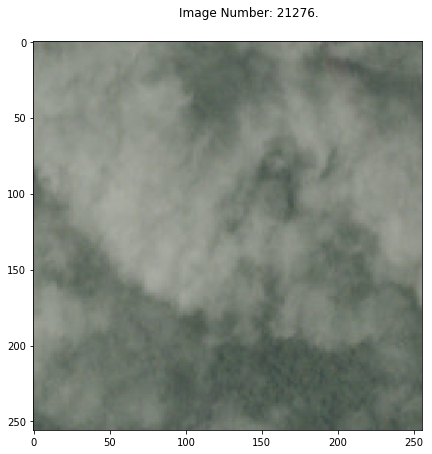

In [40]:
imageplot = plt.figure(figsize=(6, 6))
axis = imageplot.add_axes([0, 0, .9, .9])
_image = cv2.imread(TRAIN_PATH + 'train_21276.jpg')
axis.imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2RGB))
imageplot.suptitle('Image Number: 21276.')

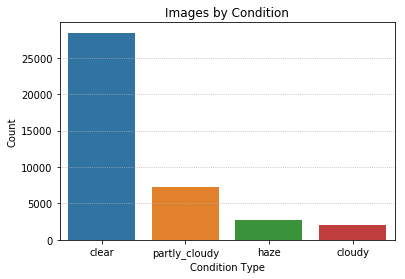

In [41]:
ConditionCounts = train_df[['clear', 'haze', 'partly_cloudy', 'cloudy']].sum().sort_values(ascending=False)
ConditionCounts = ConditionCounts.reset_index(name='Count')
fig = sns.barplot(x='index', y='Count', data=ConditionCounts)
fig.set(xlabel='Condition Type', ylabel='Count', title='Images by Condition')
fig.grid(True, axis='y', ls=':')

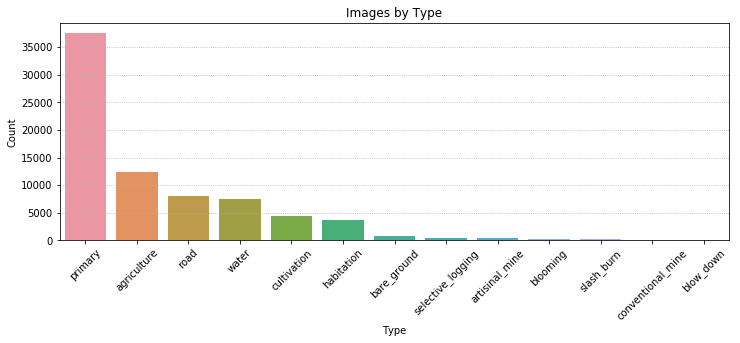

In [42]:
typeTags = ['artisinal_mine', 'blow_down', 'water', 'cultivation', 'road', 'agriculture',
            'bare_ground', 'blooming', 'selective_logging', 'habitation', 'conventional_mine',
            'slash_burn', 'primary']

TypeCounts = train_df[train_df.columns[train_df.columns.isin(typeTags)]].sum().sort_values(ascending=False)
TypeCounts = TypeCounts.reset_index(name='Count')
fig = plt.figure(figsize=(12, 4))
fig = sns.barplot(x='index', y='Count', data=TypeCounts)
fig.set(xlabel='Type', ylabel='Count', title='Images by Type')
fig.grid(True, axis='y', ls=':')
# Rotate the tick-labels
for ticklabel in fig.get_xticklabels():
    ticklabel.set_rotation(45)


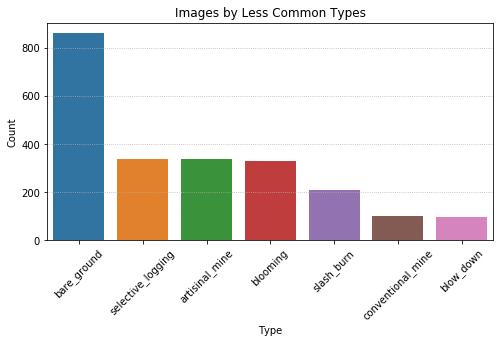

In [43]:
# Focusing on the rare types:
RareTypeCounts = train_df[['artisinal_mine', 'blow_down', 'bare_ground', 'blooming',
                         'selective_logging', 'conventional_mine',
                         'slash_burn']].sum().sort_values(ascending=False)
RareTypeCounts = RareTypeCounts.reset_index(name='Count')
fig = plt.figure(figsize=(8, 4))
fig = sns.barplot(x='index', y='Count', data=RareTypeCounts)
fig.set(xlabel='Type', ylabel='Count', title='Images by Less Common Types')
fig.grid(True, axis='y', ls=':')
# Rotate the tick-labels
for ticklabel in fig.get_xticklabels():
    ticklabel.set_rotation(45)

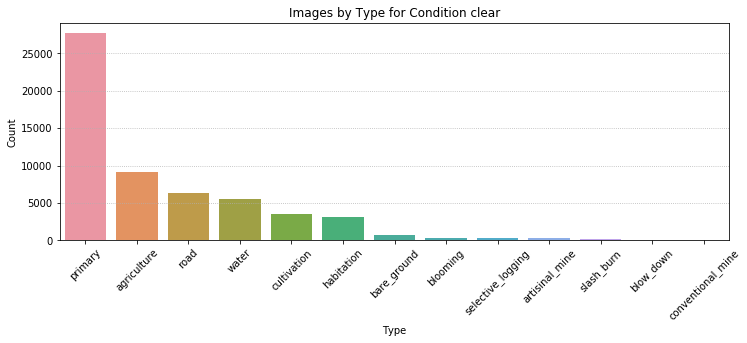

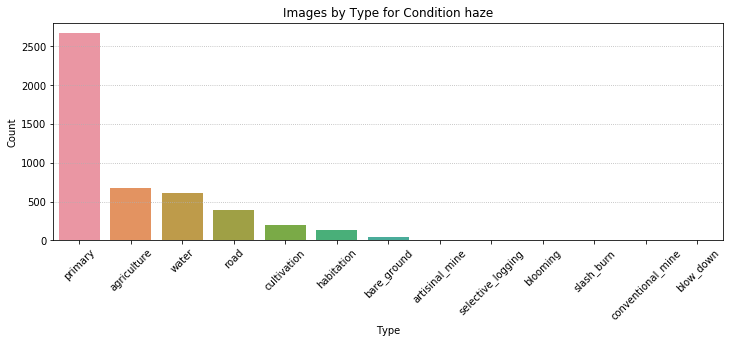

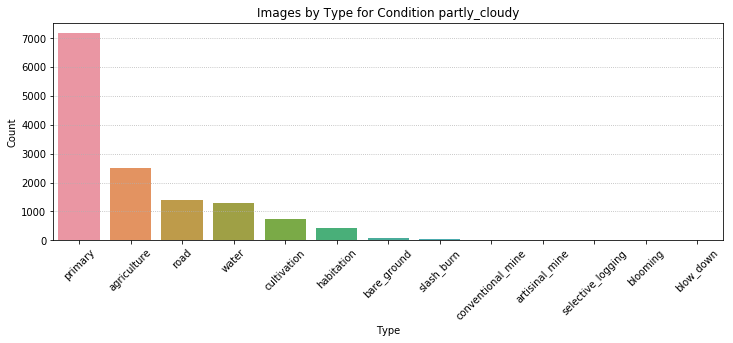

In [44]:
for condition in ['clear', 'haze', 'partly_cloudy']:
    _ConditionalTypeCounts = train_df[train_df.columns[train_df.columns.isin(typeTags)]][train_df[condition] == 1].sum().sort_values(ascending=False)
    _ConditionalTypeCounts = _ConditionalTypeCounts.reset_index(name='Count')
    fig = plt.figure(figsize=(12, 4))
    fig = sns.barplot(x='index', y='Count', data=_ConditionalTypeCounts)
    fig.set(xlabel='Type', ylabel='Count', title='Images by Type for Condition %s' % condition)
    fig.grid(True, axis='y', ls=':')
    # Rotate the tick-labels
    for ticklabel in fig.get_xticklabels():
        ticklabel.set_rotation(45)

In [97]:
def plot_image(tifImage, jpgImage, tag, imgNum):
    imageplot = plt.figure(figsize=(10, 6))
    # Plot Red Band
    axis1 = imageplot.add_axes([0, .5, .2, .4])
    axis1.imshow(tifImage[:, :, 2], cmap='Reds')
    axis1.set_title('Red')
    # Plot Green Band
    axis2 = imageplot.add_axes([.25, .5, .2, .4])
    axis2.imshow(tifImage[:, :, 1], cmap='Greens')
    axis2.set_title('Green')
    # Plot Blue Band
    axis3 = imageplot.add_axes([.5, .5, .2, .4])
    axis3.imshow(tifImage[:, :, 0], cmap='Blues')
    axis3.set_title('Blue')
    # Plot NIR Band
    axis4 = imageplot.add_axes([.75, .5, .2, .4])
    axis4.imshow(tifImage[:, :, 3], cmap='magma')
    axis4.set_title('NIR')
    # Plot image
    axis5 = imageplot.add_axes([0, 0, .2, .4])
    axis5.imshow(cv2.cvtColor(jpgImage, cv2.COLOR_BGR2RGB))
    axis5.set_title('JPG Image')
    # Plot color histogram
    axis6 = imageplot.add_axes([.3, .05, .5, .3])
    axis6.hist([tifImage[:, :, 2].flatten(), tifImage[:, :, 1].flatten(), tifImage[:, :, 0].flatten(), tifImage[:, :, 3].flatten()], bins=100, label=['r', 'g', 'b', 'nir'], color=['red', 'green', 'blue', 'magenta'], histtype='step')
    axis6.legend()
    axis6.set_title('Color Histogram')
    imageplot.suptitle('Image Number: %s. Tags: %s.' % (imgNum, tag))
    imageplot.savefig('%s' % (imgNum))

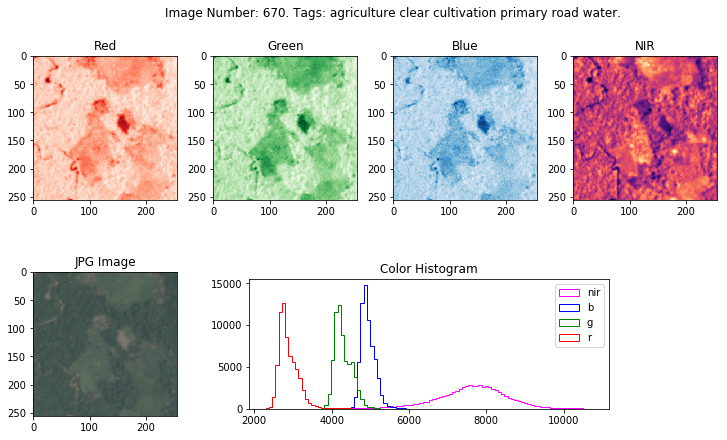

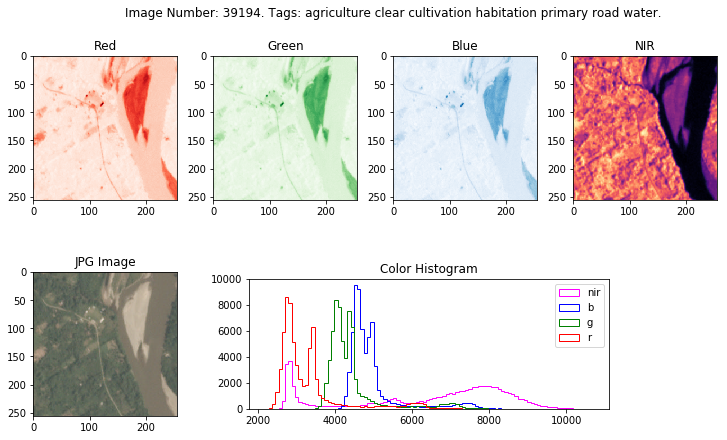

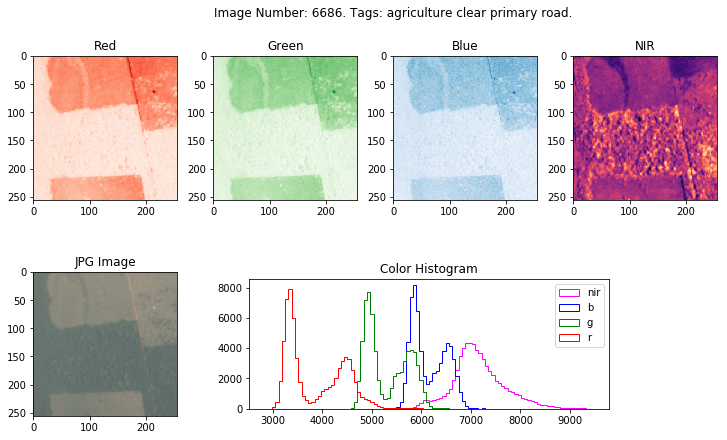

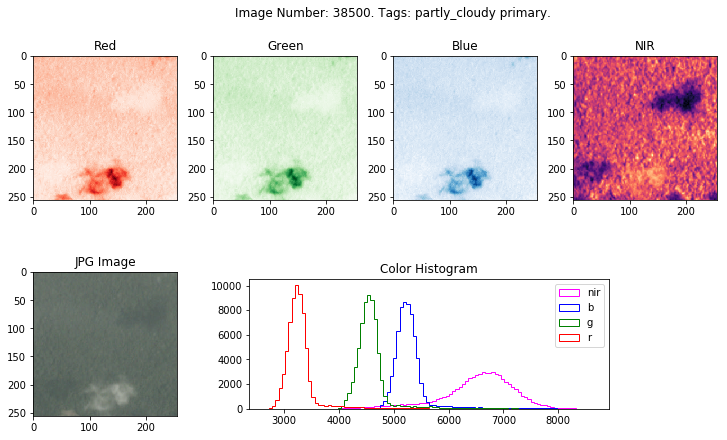

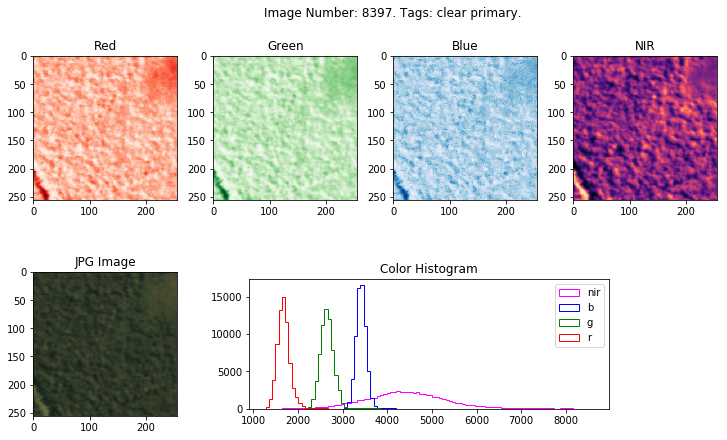

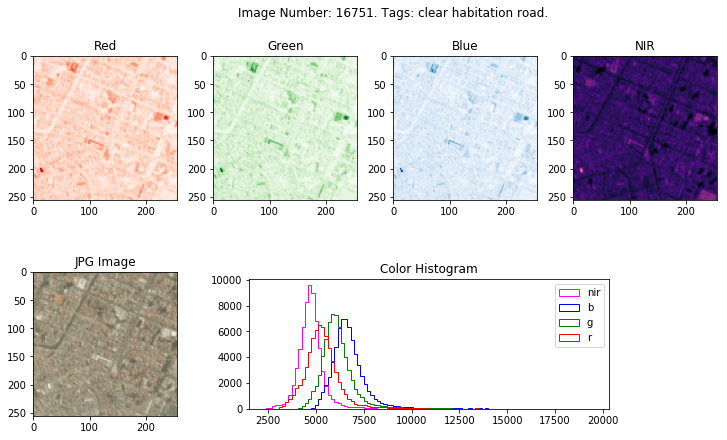

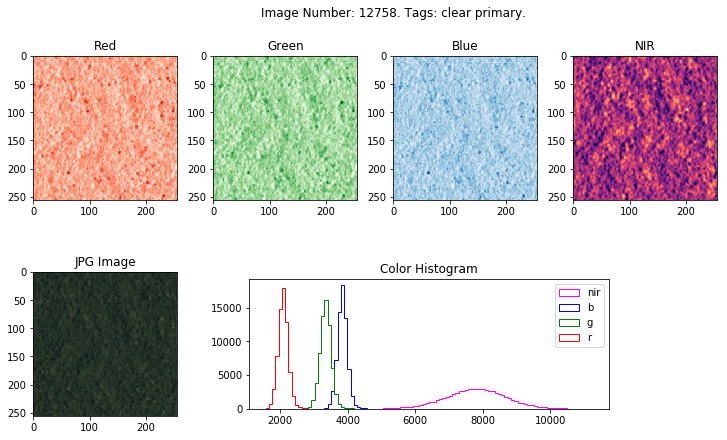

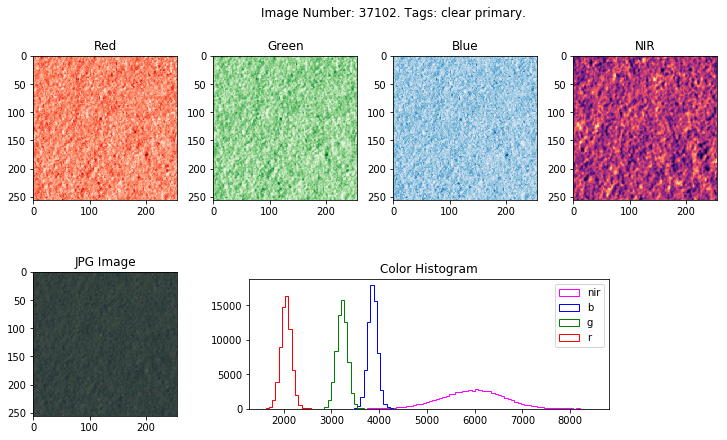

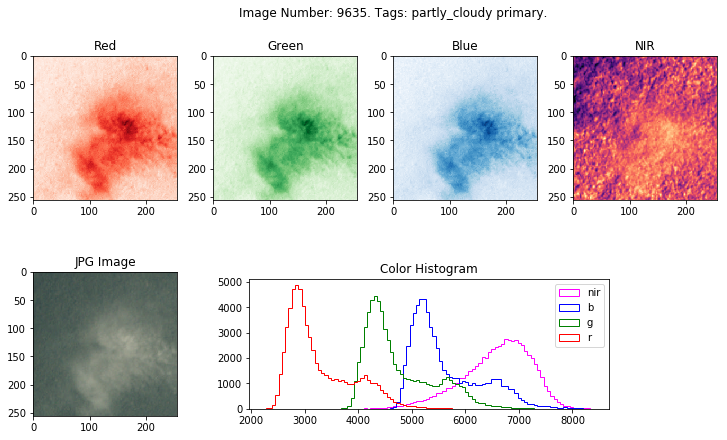

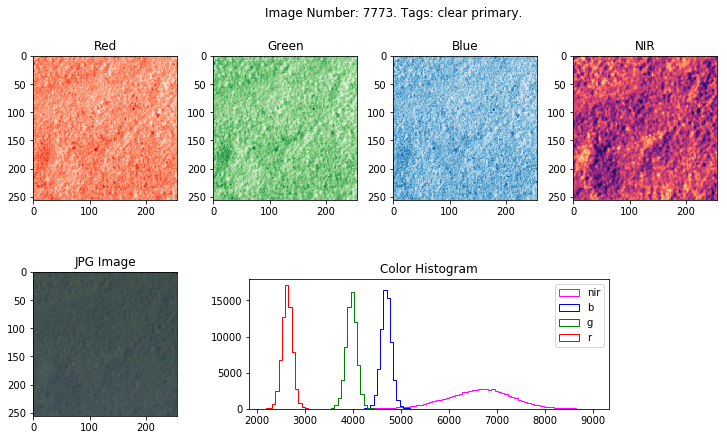

In [98]:
image_sample = train_df.sample(10)
for img in image_sample.index:
    tag = image_sample.loc[img]['tags']
    tifImage = load_image(image_sample.loc[img]['tifFilename'])
    jpgImage = cv2.imread(image_sample.loc[img]['jpgFilename'])
    plot_image(tifImage, jpgImage, tag, img)


In [61]:
def get_band_information(image):
    """Given a single color band of an image, returns the following tuple:
    (band_mean, band_median, band_std, band_max, band_min, band_kurtosis, band_skewness)
    """
    band = image[:, :].ravel()
    return (np.mean(band), np.median(band), np.std(band), np.max(band), np.min(band), stats.kurtosis(band), stats.skew(band))

In [64]:
# We will use ColorStats as an array to hold our color information and later join it to the data frame.
n, _ = train_df.shape
ColorStats = np.zeros((n, 28))
for ind in train_df.index:
    imageName = train_df['tifFilename'].loc[ind]
    current_image = load_image(imageName)
    r_stats = get_band_information(current_image[:, :, 2])
    g_stats = get_band_information(current_image[:, :, 1])
    b_stats = get_band_information(current_image[:, :, 0])
    n_stats = get_band_information(current_image[:, :, 3])
    ColorStats[ind, :7] = list(r_stats)  # columns 0-6 are for red
    ColorStats[ind, 7:14] = list(g_stats)  # columns 7-13 are for green
    ColorStats[ind, 14:21] = list(b_stats)  # columns 14-20 are for blue
    ColorStats[ind, 21:] = list(n_stats)  # columns 21-27 are for near-ir
    if ind % 100 == 0:
        print('Processed %s images.' % ind)

Processed 0 images.
Processed 100 images.
Processed 200 images.
Processed 300 images.
Processed 400 images.
Processed 500 images.
Processed 600 images.
Processed 700 images.
Processed 800 images.
Processed 900 images.
Processed 1000 images.
Processed 1100 images.
Processed 1200 images.
Processed 1300 images.
Processed 1400 images.
Processed 1500 images.
Processed 1600 images.
Processed 1700 images.
Processed 1800 images.
Processed 1900 images.
Processed 2000 images.
Processed 2100 images.
Processed 2200 images.
Processed 2300 images.
Processed 2400 images.
Processed 2500 images.
Processed 2600 images.
Processed 2700 images.
Processed 2800 images.
Processed 2900 images.
Processed 3000 images.
Processed 3100 images.
Processed 3200 images.
Processed 3300 images.
Processed 3400 images.
Processed 3500 images.
Processed 3600 images.
Processed 3700 images.
Processed 3800 images.
Processed 3900 images.
Processed 4000 images.
Processed 4100 images.
Processed 4200 images.
Processed 4300 images.


Processed 34700 images.
Processed 34800 images.
Processed 34900 images.
Processed 35000 images.
Processed 35100 images.
Processed 35200 images.
Processed 35300 images.
Processed 35400 images.
Processed 35500 images.
Processed 35600 images.
Processed 35700 images.
Processed 35800 images.
Processed 35900 images.
Processed 36000 images.
Processed 36100 images.
Processed 36200 images.
Processed 36300 images.
Processed 36400 images.
Processed 36500 images.
Processed 36600 images.
Processed 36700 images.
Processed 36800 images.
Processed 36900 images.
Processed 37000 images.
Processed 37100 images.
Processed 37200 images.
Processed 37300 images.
Processed 37400 images.
Processed 37500 images.
Processed 37600 images.
Processed 37700 images.
Processed 37800 images.
Processed 37900 images.
Processed 38000 images.
Processed 38100 images.
Processed 38200 images.
Processed 38300 images.
Processed 38400 images.
Processed 38500 images.
Processed 38600 images.
Processed 38700 images.
Processed 38800 

In [65]:
names = []
for color in ['r', 'g', 'b', 'n']:
    for stat in ['mean', 'median', 'std', 'max', 'min', 'kurtosis', 'skewness']:
        names.append(color + '_' + stat)

In [66]:
ColorStatsDF = pd.DataFrame(ColorStats, columns=names)
ColorStatsDF.head()

r_mean  r_median       r_std   r_max   r_min  r_kurtosis  r_skewness  \
0  2823.257050    2819.0   85.647217  3396.0  2469.0    0.965014    0.387792   
1  2477.354996    2336.0  383.497120  5510.0  1809.0    4.923805    1.713841   
2  2030.450165    2031.0  112.283244  2752.0  1613.0    0.298555    0.058924   
3  2479.578049    2478.0  111.271727  3384.0  2090.0    1.189625    0.358904   
4  3381.794922    3228.0  611.183348  8479.0  2348.0    6.517757    2.443548   

        g_mean  g_median       g_std     ...       b_min  b_kurtosis  \
0  4369.526978    4367.0   83.879425     ...      4860.0    0.597669   
1  3666.500900    3510.0  421.583711     ...      3637.0    4.451386   
2  3214.830826    3217.0  112.536970     ...      3572.0    0.362588   
3  3699.635529    3700.0  115.832992     ...      4095.0    0.765090   
4  4433.354370    4295.0  575.751792     ...      4210.0    9.057131   

   b_skewness       n_mean  n_median        n_std    n_max   n_min  \
0    0.165912  6126.069626    6122.0   406.868986   8527.0  4559.0   
1    1.410764  7140.713974    7086.0  1295.642057  11467.0  3128.0   
2    0.075739  5774.253342    5790.0   724.758868   8783.0  2964.0   
3    0.233627  5577.092361    5598.0   630.781636   8278.0  3434.0   
4    2.325429  8818.953049    8713.0  1314.023509  13208.0  4887.0   

   n_kurtosis  n_skewness  
0    0.295068    0.112706  
1   -0.383098    0.041964  
2    0.039722   -0.094088  
3    0.048179   -0.092494  
4   -0.076711    0.422574  

[5 rows x 28 columns]

In [93]:
ColorStatsDF.to_csv('ColorStatsDF')

In [67]:
Labels = pd.concat([train_df, ColorStatsDF], axis=1)
Labels.head()

image_name                                       tags  clear  road  \
0    train_0                               haze primary      0     0   
1    train_1            agriculture clear primary water      1     0   
2    train_2                              clear primary      1     0   
3    train_3                              clear primary      1     0   
4    train_4  agriculture clear habitation primary road      1     1   

   blow_down  habitation  partly_cloudy  primary  selective_logging  haze  \
0          0           0              0        1                  0     1   
1          0           0              0        1                  0     0   
2          0           0              0        1                  0     0   
3          0           0              0        1                  0     0   
4          0           1              0        1                  0     0   

     ...       b_min  b_kurtosis  b_skewness       n_mean  n_median  \
0    ...      4860.0    0.597669    0.165912  6126.069626    6122.0   
1    ...      3637.0    4.451386    1.410764  7140.713974    7086.0   
2    ...      3572.0    0.362588    0.075739  5774.253342    5790.0   
3    ...      4095.0    0.765090    0.233627  5577.092361    5598.0   
4    ...      4210.0    9.057131    2.325429  8818.953049    8713.0   

         n_std    n_max   n_min  n_kurtosis n_skewness  
0   406.868986   8527.0  4559.0    0.295068   0.112706  
1  1295.642057  11467.0  3128.0   -0.383098   0.041964  
2   724.758868   8783.0  2964.0    0.039722  -0.094088  
3   630.781636   8278.0  3434.0    0.048179  -0.092494  
4  1314.023509  13208.0  4887.0   -0.076711   0.422574  

[5 rows x 49 columns]

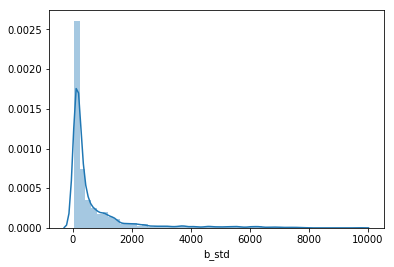

In [99]:
sns.distplot(Labels[Labels['cloudy'] == 1]['b_std'], kde=True)
plt.savefig('../images/cloudyDist')

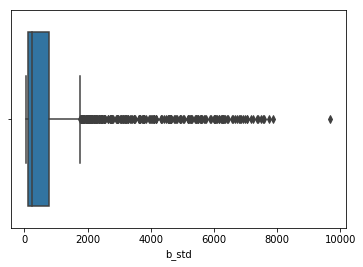

In [100]:
sns.boxplot(Labels[Labels['cloudy'] == 1]['b_std'])
plt.savefig('../images/cloudyBox')

In [70]:
Labels[(Labels['cloudy'] == 1) & (Labels['b_std'] > 8000)]

image_name    tags  clear  road  blow_down  habitation  partly_cloudy  \
352    train_352  cloudy      0     0          0           0              0   
2550  train_2550  cloudy      0     0          0           0              0   

      primary  selective_logging  haze    ...       b_min  b_kurtosis  \
352         0                  0     0    ...      5154.0   -1.404142   
2550        0                  0     0    ...      7842.0   -1.552859   

      b_skewness        n_mean  n_median        n_std    n_max   n_min  \
352     0.609813  10981.398560    8195.0  5274.195048  25013.0  3908.0   
2550   -0.054617  11968.680008   11563.5  5105.628103  23236.0  3382.0   

      n_kurtosis n_skewness  
352    -0.548845    0.90253  
2550   -1.152671    0.17878  

[2 rows x 49 columns]

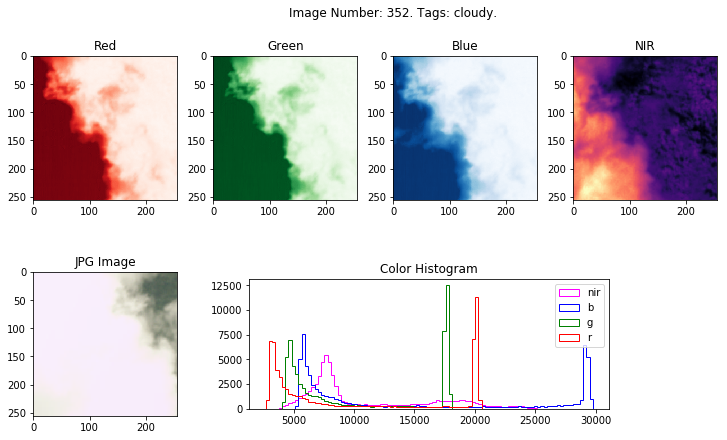

In [71]:
plot_image(
    io.imread(Labels['tifFilename'].loc[352]), 
    cv2.imread(Labels['jpgFilename'].loc[352]), 
    Labels['tags'].loc[352], 352)

In [72]:
cv2imageplot = plt.figure(figsize=(6, 6))
axis = imageplot.add_axes([0, 0, .9, .9])
_image = cv2.imread(TRAIN_PATHIN_PATH + 'train_352.jpg')
axis.imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2RGB))
imageplot.suptitle('Image Number: 352.')

/home/clu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0.98,'Image Number: 352.')

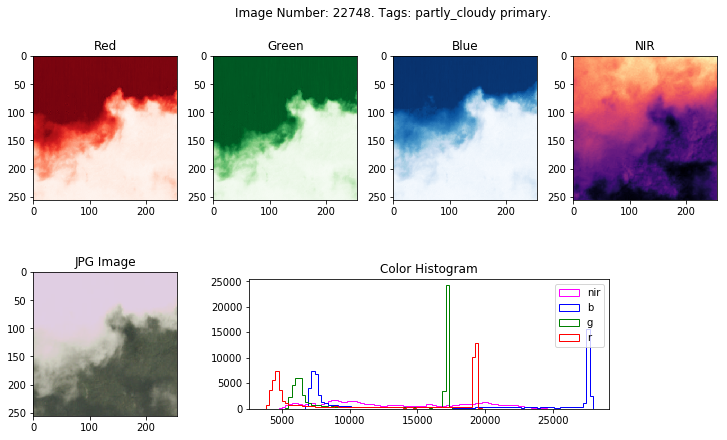

In [73]:
plot_image(io.imread(Labels['tifFilename'].loc[22748]), 
           cv2.imread(Labels['jpgFilename'].loc[22748]), 
           Labels['tags'].loc[22748], 22748)

Text(0.5,0.98,'Image Number: 22748.')

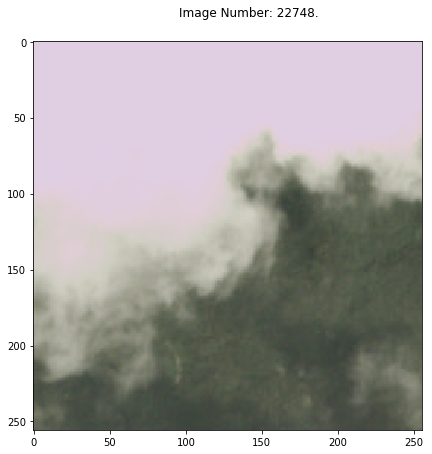

In [74]:
imageplot = plt.figure(figsize=(6, 6))
axis = imageplot.add_axes([0, 0, .9, .9])
_image = cv2.imread(TRAIN_PATH + 'train_22748.jpg')
axis.imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2RGB))
imageplot.suptitle('Image Number: 22748.')

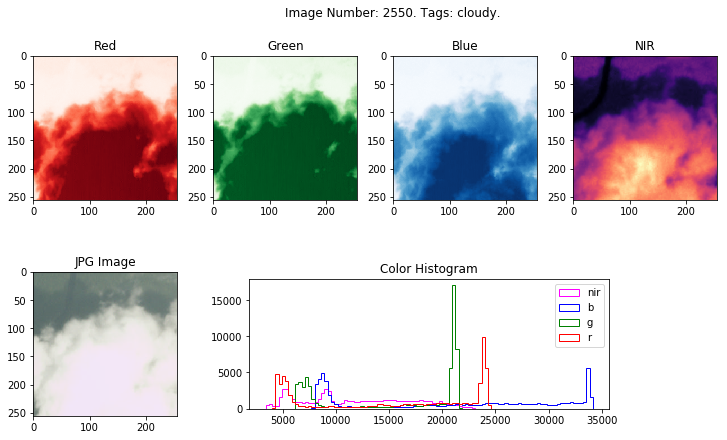

In [75]:
plot_image(io.imread(Labels['tifFilename'].loc[2550]), 
           cv2.imread(Labels['jpgFilename'].loc[2550]), 
           Labels['tags'].loc[2550], 2550)

Text(0.5,0.98,'Image Number: 2550.')

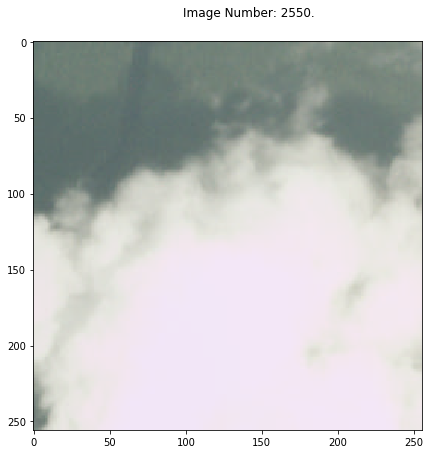

In [76]:
imageplot = plt.figure(figsize=(6, 6))
axis = imageplot.add_axes([0, 0, .9, .9])
_image = cv2.imread(TRAIN_PATH + 'train_2550.jpg')
axis.imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2RGB))
imageplot.suptitle('Image Number: 2550.')

In [77]:
Labels.loc[2550, 'cloudy'] = 0
Labels.loc[2550, 'partly_cloudy'] = 1
Labels.loc[2550, 'primary'] = 1
Labels.loc[2550, 'tags'] = 'partly_cloudy primary'

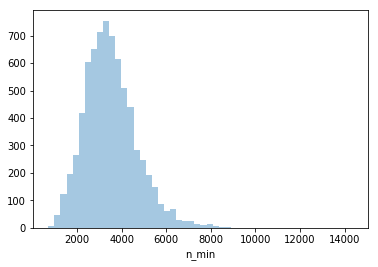

In [78]:
sns.distplot(Labels[Labels['partly_cloudy'] == 1]['n_min'], kde=False)

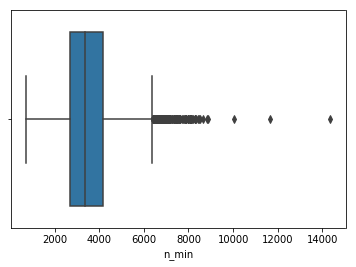

In [79]:
sns.boxplot(Labels[Labels['partly_cloudy'] == 1]['n_min'])

In [80]:
Labels[(Labels['partly_cloudy'] == 1) & (Labels['n_min'] > 14000)]

image_name                   tags  clear  road  blow_down  habitation  \
35252  train_35252  partly_cloudy primary      0     0          0           0   

       partly_cloudy  primary  selective_logging  haze    ...        b_min  \
35252              1        1                  0     0    ...      10273.0   

       b_kurtosis  b_skewness        n_mean  n_median        n_std    n_max  \
35252   43.434203   -6.224899  23583.282608   23974.0  2445.938559  28722.0   

         n_min  n_kurtosis n_skewness  
35252  14358.0   -0.051059  -0.612771  

[1 rows x 49 columns]

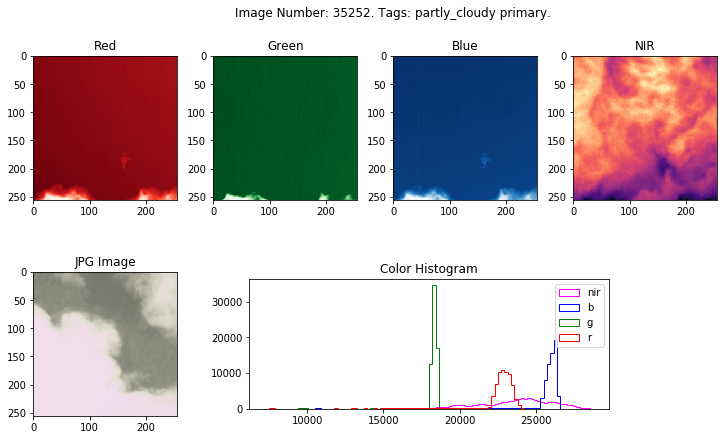

In [81]:
plot_image(io.imread(Labels['tifFilename'].loc[35252]), 
           cv2.imread(Labels['jpgFilename'].loc[35252]), 
           Labels['tags'].loc[35252], 35252)

Text(0.5,0.98,'Image Number: 35252.')

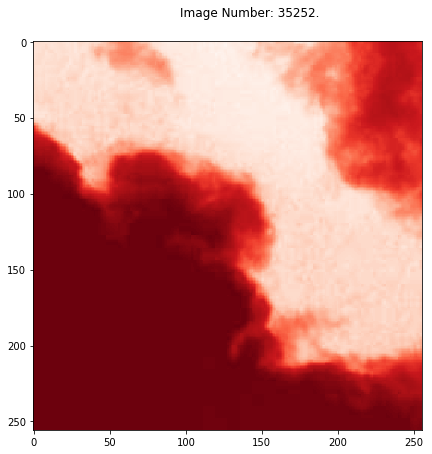

In [84]:
imageplot = plt.figure(figsize=(6, 6))
axis = imageplot.add_axes([0, 0, .9, .9])
_image = cv2.imread(TRAIN_PATH + 'train_35252.jpg')
axis.imshow(_image[:, :, 0], cmap = 'Reds')
imageplot.suptitle('Image Number: 35252.')

In [85]:
Labels[['tifFilename', 'jpgFilename']].loc[35252]

tifFilename    /data/amazon/train-tif-v2/train_35252.tif
jpgFilename       /data/amazon/train-jpg/train_35252.jpg
Name: 35252, dtype: object

In [104]:
# Create a list of statistics that we can log transform. We will not log transform skew or kurtosis.
lognames = []
for color in ['r', 'g', 'b', 'n']:
    for stat in ['mean', 'median', 'std', 'max', 'min']:
        lognames.append(color + '_' + stat)


# Helper functions for investigating band statistics.
def plot_band_stats(DataFrame, name='Unknown'):
    """Given a DataFrame as a data frame of Labels, will plot all band statistics for that data frame.

    Parameters
        DataFrame: The data frame of Labels to plot
        name: Name for the statistics.

    Example
    plot_band_stats(Labels['primary'], 'primary') will plot all band statistics for images
    that are tagged 'primary'
    """
    for stat in names:
        fig = plt.figure(figsize=(9, 4))
        histogram = plt.subplot(2, 1, 1)
        sns.distplot(DataFrame[stat], kde=False, bins=100)
        boxplot = plt.subplot(2, 1, 2)
        sns.boxplot(DataFrame[stat])
        plt.suptitle(stat + ' for: ' + name)
        plt.savefig('../images/%s_%s' % (name, stat))


def plot_logband_stats(DataFrame, name='Unknown'):
    """Given a DataFrame as a data frame of Labels, will plot logged band statistics for that data frame.
    Note: skewness and kurotosis are not plotted.

    Parameters
        DataFrame: The data frame of Labels to plot
        name: Name for the statistics.

    Example
    plot_band_stats(Labels['primary'], 'primary') will plot all logged band statistics for images
    that are tagged 'primary'
    """
    for stat in lognames:
        fig = plt.figure(figsize=(9, 4))
        histogram = plt.subplot(2, 1, 1)
        sns.distplot(np.log(1 + DataFrame[stat]), kde=False, bins=100)
        boxplot = plt.subplot(2, 1, 2)
        sns.boxplot(np.log(1 + DataFrame[stat]))
        plt.suptitle('logged ' + stat + ' for: ' + name)

/home/clu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


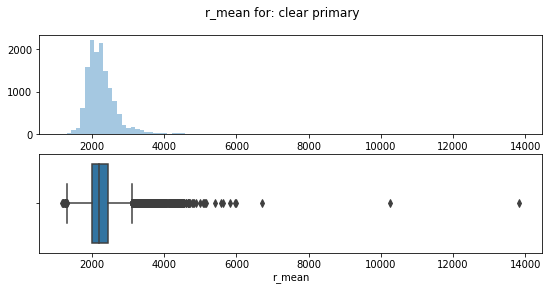

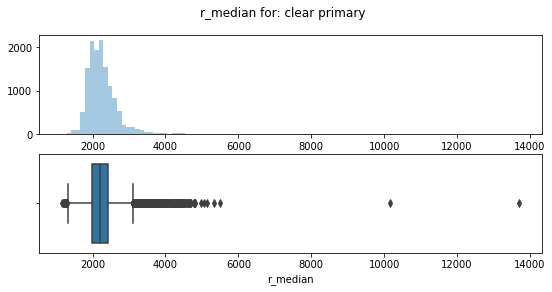

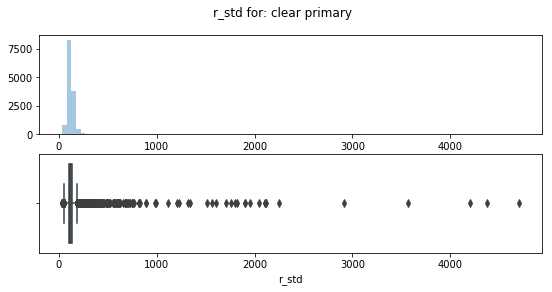

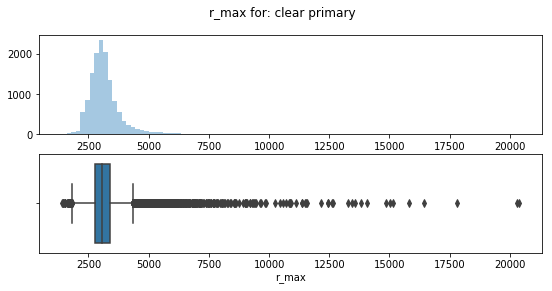

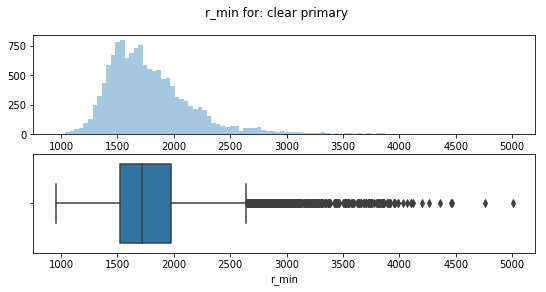

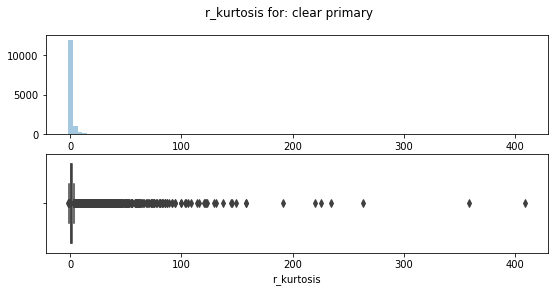

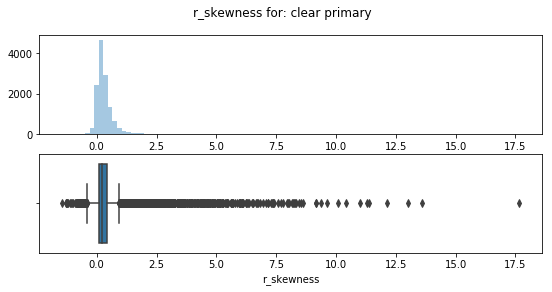

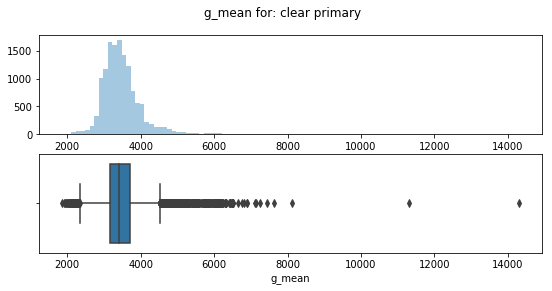

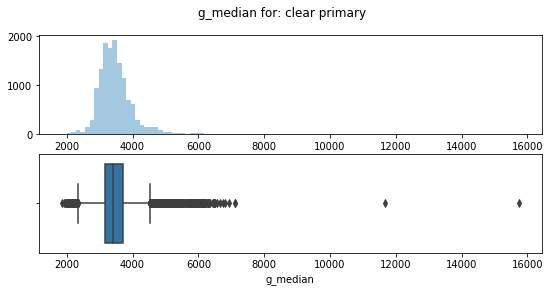

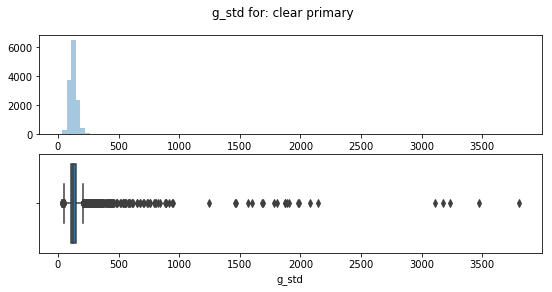

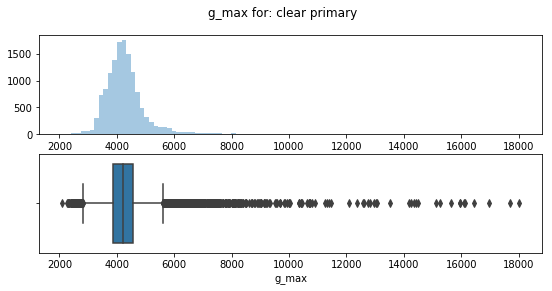

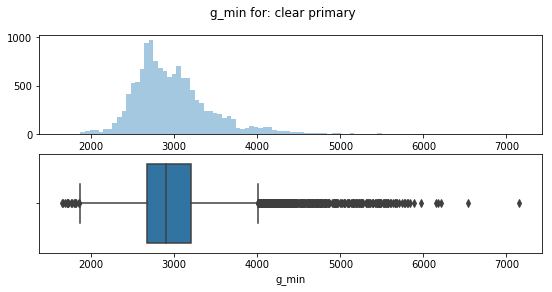

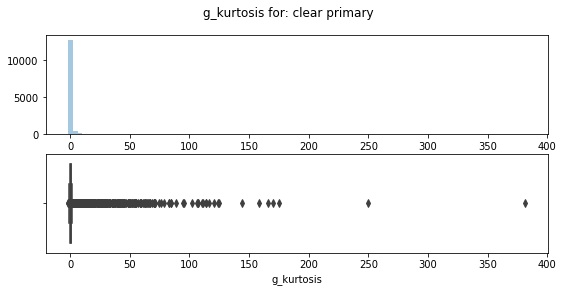

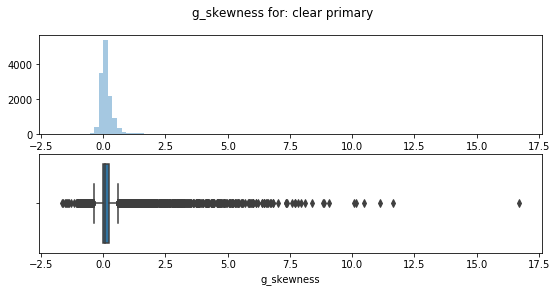

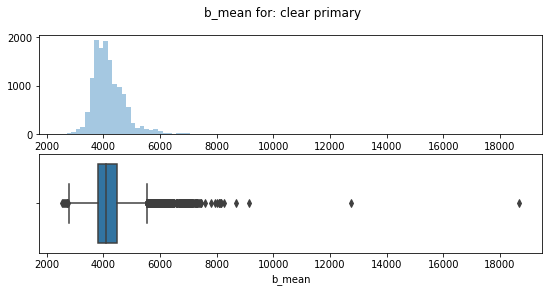

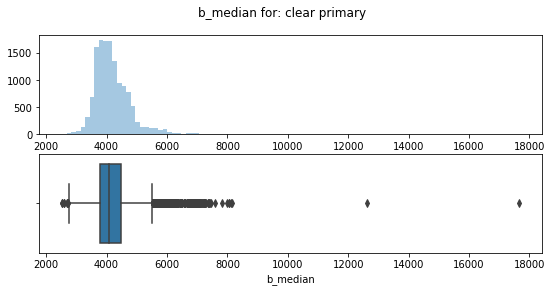

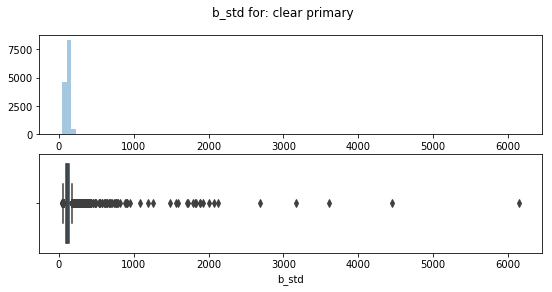

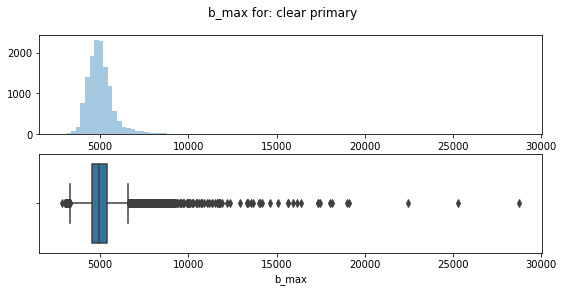

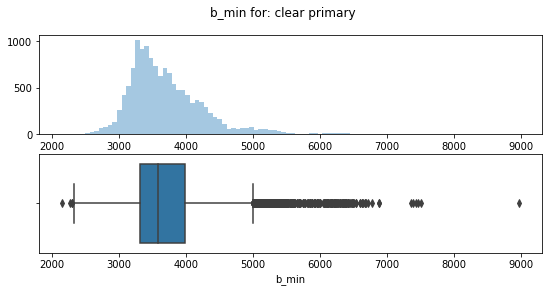

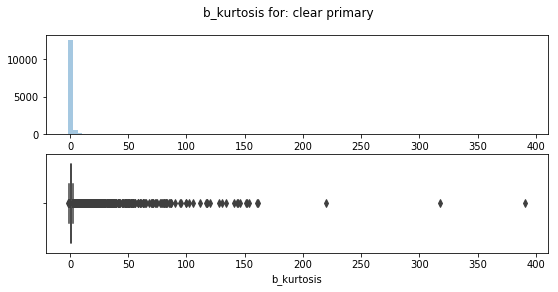

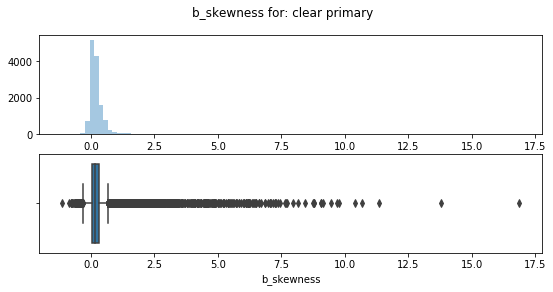

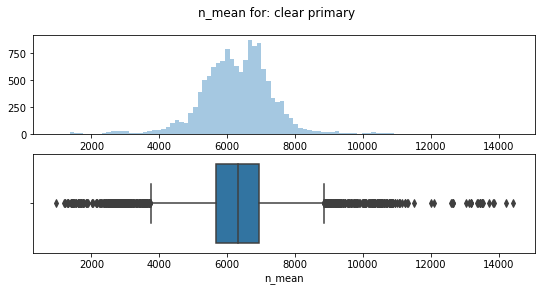

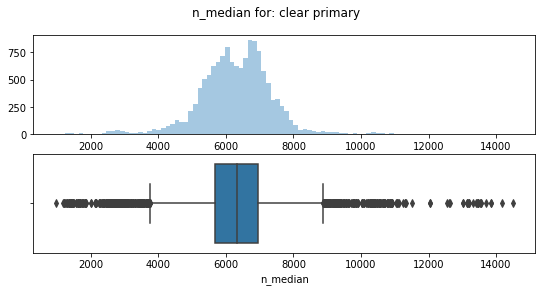

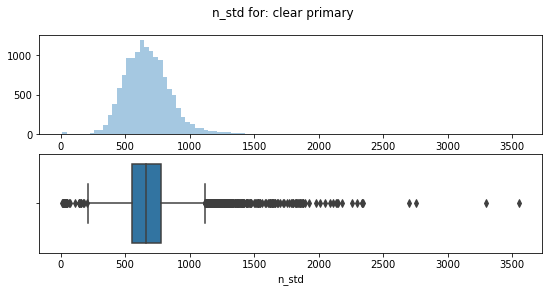

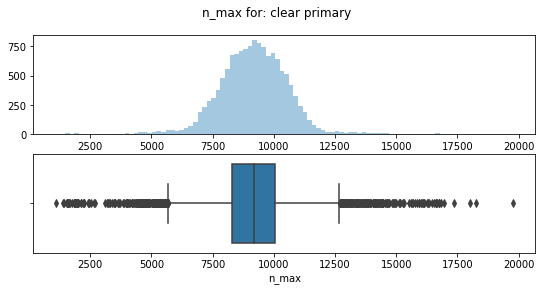

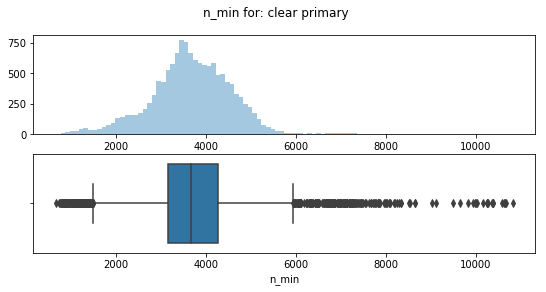

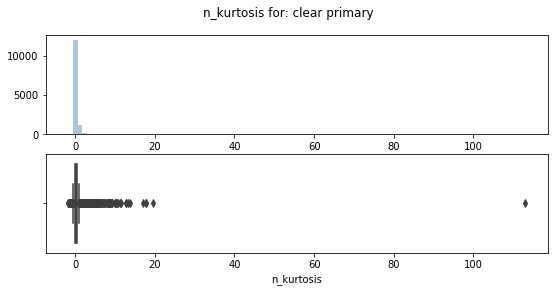

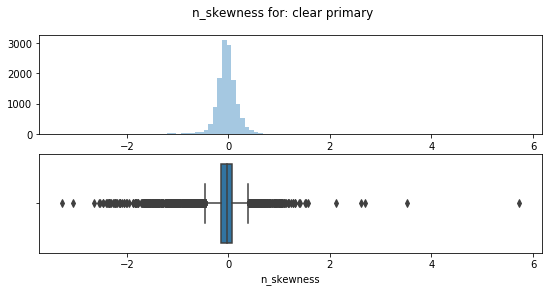

In [105]:
ClearPrimary = Labels[Labels['tags'] == 'clear primary']
plot_band_stats(ClearPrimary, name='clear primary')

In [88]:
IQR = stats.iqr(ClearPrimary['n_max'])
Lower = np.percentile(ClearPrimary['n_max'], 25) - 3*IQR
Upper = np.percentile(ClearPrimary['n_max'], 75) + 3*IQR

In [91]:
Candidates = ClearPrimary[(ClearPrimary['n_max'] < Lower) | (ClearPrimary['n_max'] > Upper)]
Candidates.shape

(70, 49)

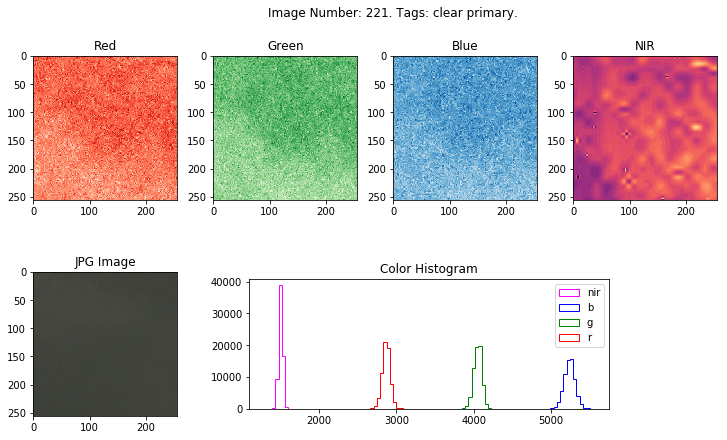

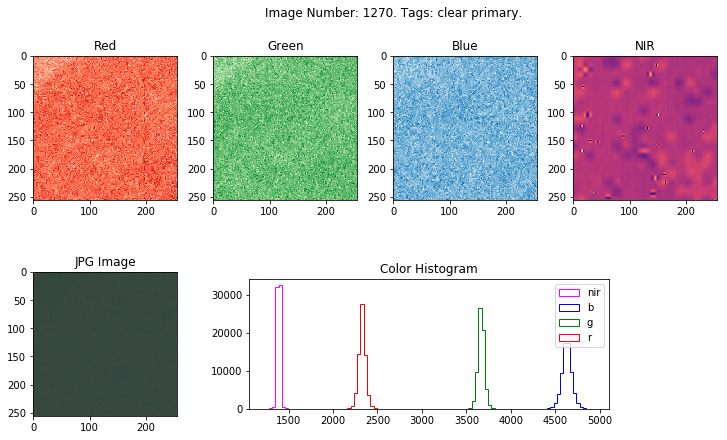

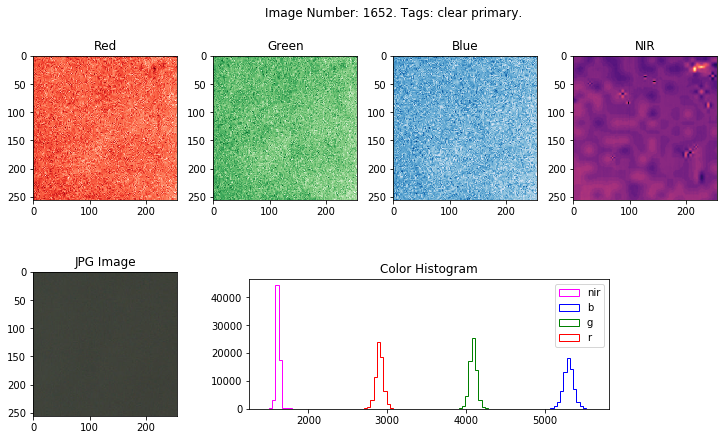

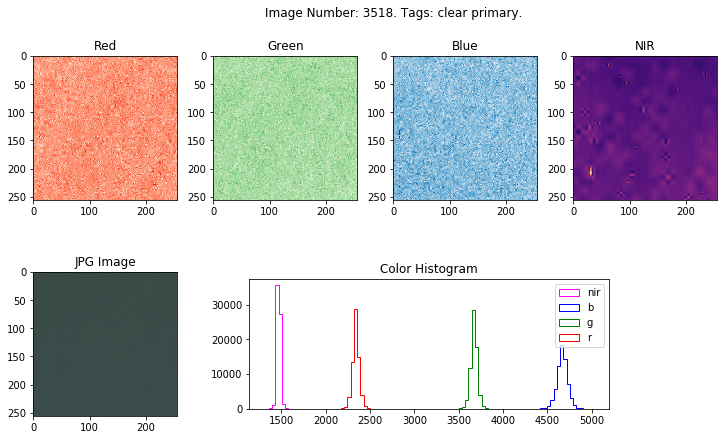

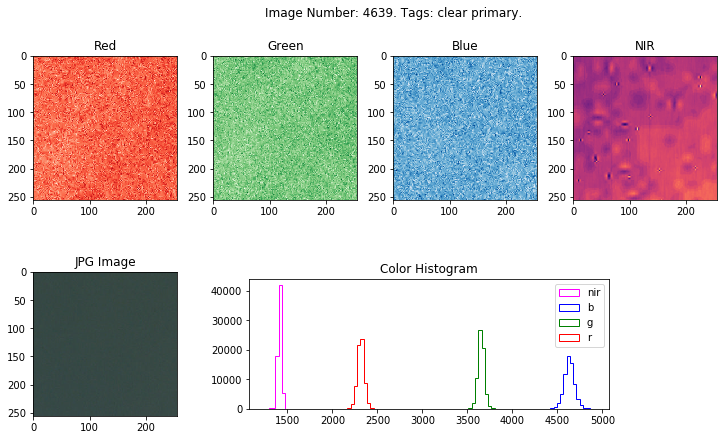

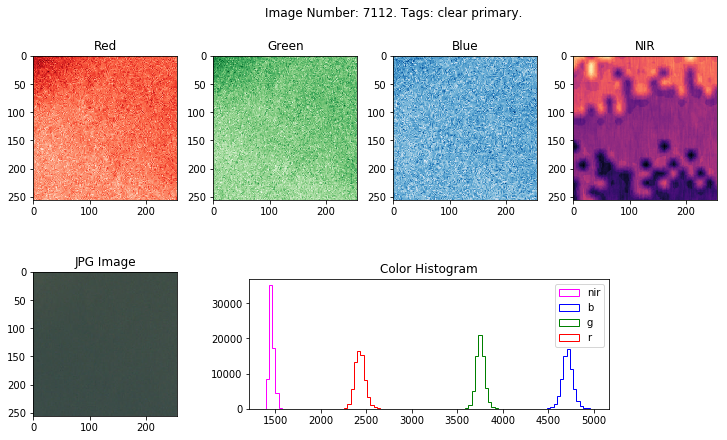

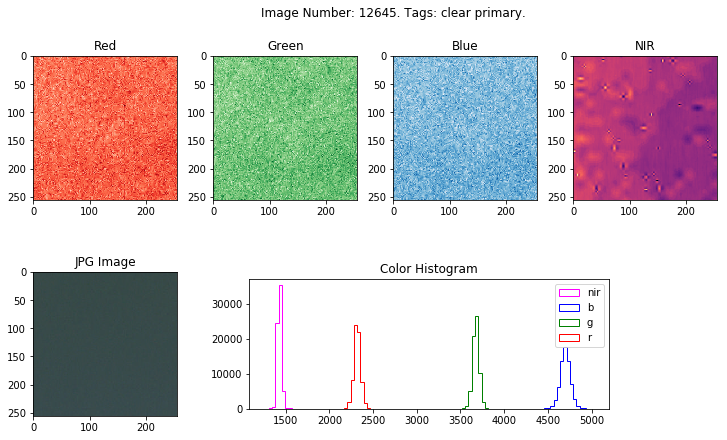

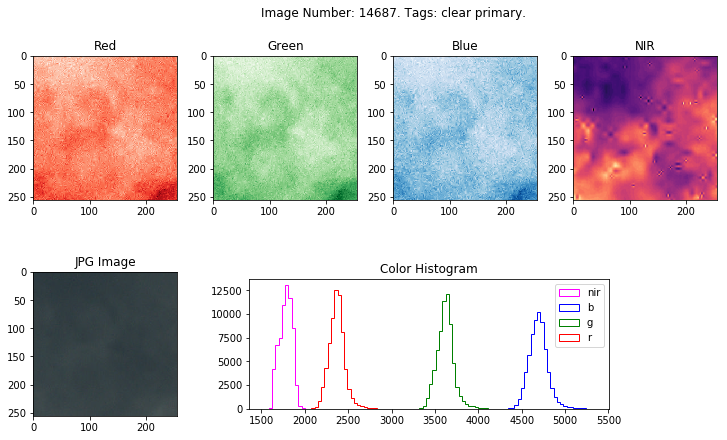

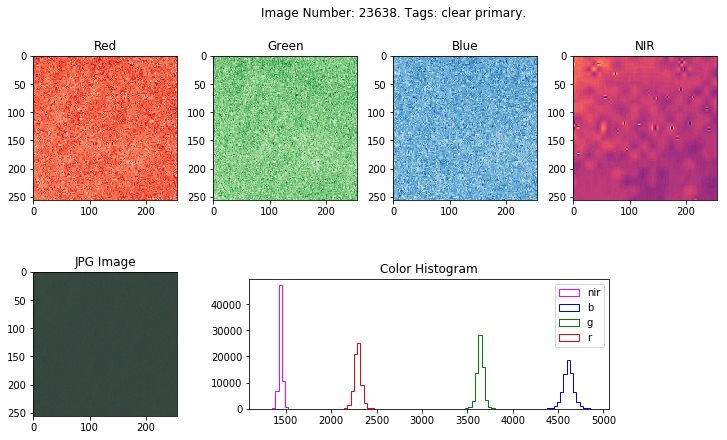

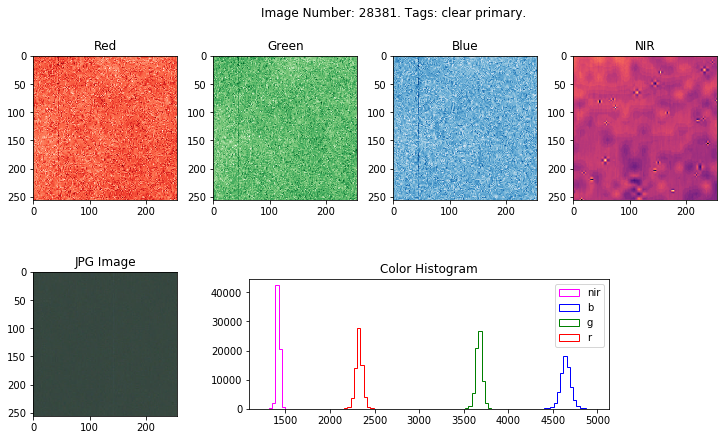

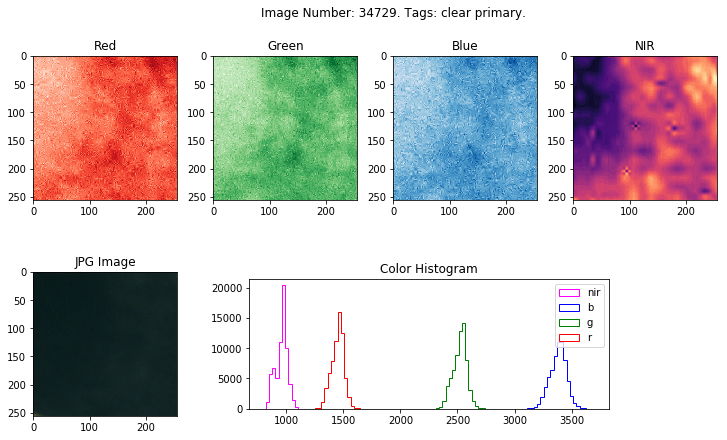

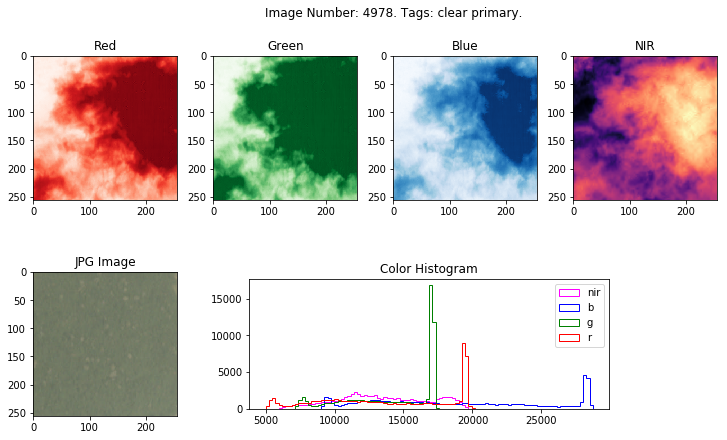

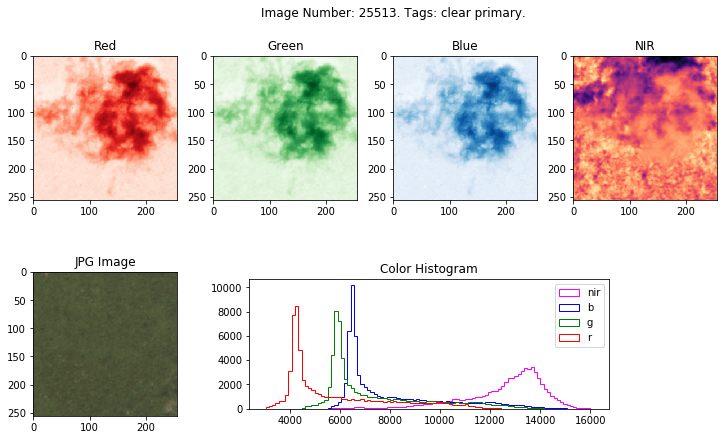

In [102]:
for img in [221, 1270, 1652, 3518, 4639, 7112, 12645, 14687, 23638, 28381, 34729, 4978, 25513]:
    tag = Candidates.loc[img]['tags']
    tifImage = load_image(Candidates.loc[img]['tifFilename'])
    jpgImage = cv2.imread(Candidates.loc[img]['jpgFilename'])
    plot_image(tifImage, jpgImage, tag, img)
    plt.savefig('../images/%s' % str(img))